<a href="https://colab.research.google.com/github/rmowatt21/python/blob/main/Capstone_lll_Pharmaceutical_Spending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA

In [ ]:
# import & alias modules
import math 
import pandas as pd
from scipy import stats
import seaborn  as sns 
import matplotlib.pyplot as plt
sns.set()

Pharmaceutical Spending by countries - https://data.oecd.org/healthres/pharmaceutical-spending.htm 

"Pharmaceutical spending covers expenditure on prescription medicines and self-medication, often referred to as over-the-counter products. In some countries, other medical non-durable goods are also included. Pharmaceuticals consumed in hospitals and other health care settings are excluded. Final expenditure on pharmaceuticals includes wholesale and retail margins and value-added tax. Total pharmaceutical spending refers in most countries to “net” spending, i.e. adjusted for possible rebates payable by manufacturers, wholesalers or pharmacies. This indicator is measured as a share of total health spending, in USD per capita (using economy-wide PPPs) and as a share of GDP."

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Pharmaceutical.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB


In [ ]:
df.tail()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
1031,LTU,2012,28.942,1.820,448.728,NaN,1340.70
1032,LTU,2013,28.173,1.728,461.178,NaN,1364.02
1033,LTU,2014,27.836,1.724,485.245,NaN,1422.92
1034,LTU,2015,26.784,1.745,504.422,NaN,1465.30
1035,RUS,2015,22.939,1.286,309.900,NaN,44655.62


In [ ]:
df.describe()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,1996.809846,16.406307,1.170948,295.046989,11765.423118
std,12.498330,6.389064,0.465635,209.152134,34878.286123
min,1970.000000,5.545000,0.207000,3.160000,6.290000
25%,1987.000000,11.516250,0.768250,111.098500,728.180000
50%,1999.000000,14.967500,1.141500,266.332000,2349.570000
75%,2007.000000,20.590500,1.523250,446.109500,7778.180000
max,2016.000000,40.239000,2.797000,1162.399000,373009.910000


In [ ]:
df.iloc[606:621]

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
606,MEX,2001,19.889,1.045,105.263,NaN,10849.15
607,MEX,2002,21.640,1.170,120.726,NaN,12598.44
608,MEX,2003,35.894,2.134,230.651,B,24366.08
609,MEX,2004,35.048,2.120,242.481,NaN,25944.40
610,MEX,2005,35.603,2.108,260.194,NaN,28223.82
611,MEX,2006,34.725,1.984,267.984,NaN,29503.00
612,MEX,2007,33.928,1.974,279.012,NaN,31203.68
613,MEX,2008,33.143,1.904,280.672,NaN,31901.69
614,MEX,2009,32.454,2.004,288.566,NaN,33330.88
615,MEX,2010,31.497,1.896,287.049,NaN,33676.28


In [ ]:
df.iloc[958:972]

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
958,USA,2002,12.075,1.686,643.351,NaN,185043.96
959,USA,2003,12.327,1.782,707.226,NaN,205171.87
960,USA,2004,12.505,1.818,762.271,NaN,223196.99
961,USA,2005,12.471,1.814,803.701,NaN,237506.99
962,USA,2006,12.725,1.866,866.302,NaN,258487.11
963,USA,2007,12.641,1.884,905.301,NaN,272704.91
964,USA,2008,12.399,1.896,917.815,NaN,279102.00
965,USA,2009,12.331,2.015,946.894,NaN,290480.12
966,USA,2010,11.938,1.957,946.859,NaN,292909.12
967,USA,2011,11.855,1.939,965.580,NaN,300935.91


**DATA EXPLORATION **

The data focuses on three primary data points. Total Spending, PC_GDP(percent change in GDP), USD_CAP( US dollar per capita).

In [ ]:
df.corr()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
TIME,1.000000,0.253944,0.610949,0.836909,0.234558
PC_HEALTHXP,0.253944,1.000000,0.721541,0.140570,0.002035
PC_GDP,0.610949,0.721541,1.000000,0.673536,0.333780
USD_CAP,0.836909,0.140570,0.673536,1.000000,0.494501
TOTAL_SPEND,0.234558,0.002035,0.333780,0.494501,1.000000


**Hypothesis 1**:

H₀: µ = µ₀ - There is no statistically significant difference between Total Spending of countries with a GDP per capita lower than average and countries with a GDP per capita higher than average.

Hₐ: µ ≠ µ₀- There is a statistically significant difference between Total Spending of countries with a GDP per capita lower than average and countries with a GDP per capita higher than average.

**Hypothesis 2:**

H₀: µ = µ₀ - There is no statistically significant difference between Total Spending of countries with a USA per capita lower than average and countries with a USA per capita higher than average.

Hₐ: µ ≠ µ₀- There is a statistically significant difference between Total Spending of countries with a USA per capita lower than average and countries with a USA per capita higher than average.

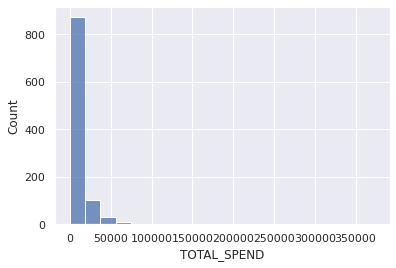

In [ ]:
sns.histplot(df['TOTAL_SPEND'], bins = 20)

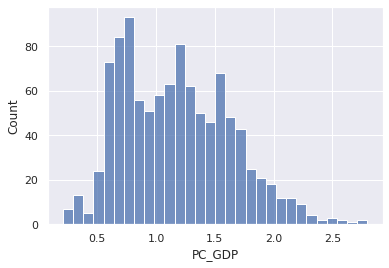

In [ ]:
sns.histplot(df['PC_GDP'], bins=30)

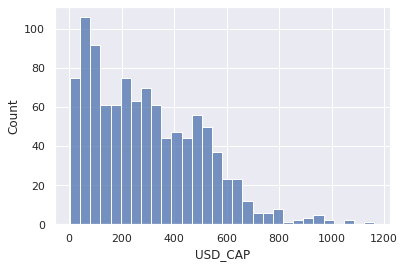

In [ ]:
sns.histplot(df['USD_CAP'], bins=30)

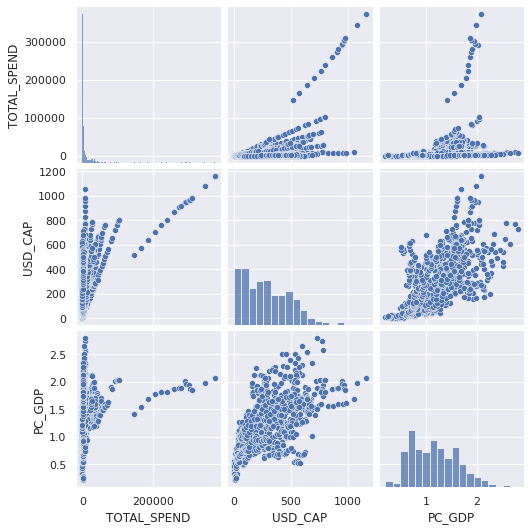

In [ ]:
sns.pairplot(df,vars= ['TOTAL_SPEND', 'USD_CAP','PC_GDP'])

Analysis - TOTAL SPEND 

In [ ]:
low_gdp = df.loc[df['PC_GDP'] > 2.0]
high_gdp = df.loc[df['PC_GDP'] < 2.0]

lower_GDP = df.loc[df.['PC_GDP'] 

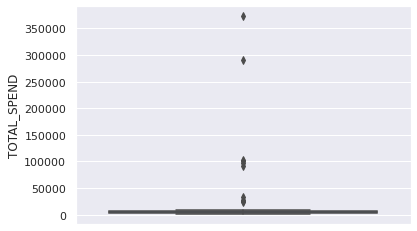

In [ ]:
sns.boxplot(y='TOTAL_SPEND', data= low_gdp)

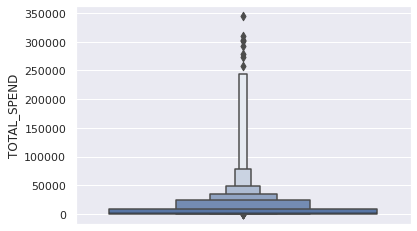

In [ ]:
sns.boxenplot(y='TOTAL_SPEND', data= high_gdp)

In [ ]:
stats.ttest_ind(low_gdp['TOTAL_SPEND'], high_gdp['TOTAL_SPEND'])

Ttest_indResult(statistic=-4.725075477346208, pvalue=2.618176618459895e-06)

The p-value is less than 0.05, so there is a statistically significant difference between the two samples. Therefore, we reject the null hypothesis.

**Analysis - USD_CAP**

In [ ]:
high_USD_CAP = df.loc[df['USD_CAP'] > 2.0]
low_USD_CAP = df.loc[df['USD_CAP'] < 2.0]

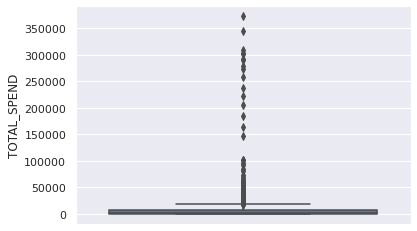

In [ ]:
sns.boxplot(y='TOTAL_SPEND', data=low_USD_CAP)

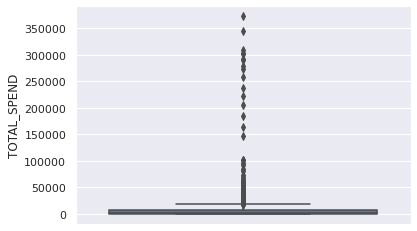

In [ ]:
sns.boxplot(y='TOTAL_SPEND', data=high_USD_CAP)

In [ ]:
stats.ttest_ind(high_USD_CAP['TOTAL_SPEND'], low_USD_CAP['TOTAL_SPEND'])

Ttest_indResult(statistic=nan, pvalue=nan)

The p-value is less than 0.05, so there is a statistically significant difference between the two samples. Therefore, we reject the null hypothesis.

Evidence shows that there is a significant different between (USD per capita & PC(percent change) in GDP and they play a signifcant factor. 

RECOMMENDATION: based on the supporting data, there is a consistent increase in overall spending in the health care system. The GDP and USD per capita spending between countries does play a role in overall pharmaceutical spending. Furthering our buying power to keep up with the demand of Pharmaceutical and other health care needs.  